In [98]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
from datetime import datetime, timedelta

In [99]:
# Load in an example site
f = "./data/fire_sites/Harts Pass_swe.csv"
df = pd.read_csv(f, parse_dates=['datetime'])[['datetime', 'SNOTEL:WTEQ_D']].set_index('datetime').rename({"SNOTEL:WTEQ_D":"SWE"}, axis=1)
df.head()

,SWE
datetime,
1982-10-01,0.0
1982-10-02,0.0
1982-10-03,0.0
1982-10-04,0.0
1982-10-05,0.0


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14282 entries, 1982-10-01 to 2021-11-06
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SWE     14282 non-null  float64
dtypes: float64(1)
memory usage: 223.2 KB


<AxesSubplot:xlabel='datetime'>

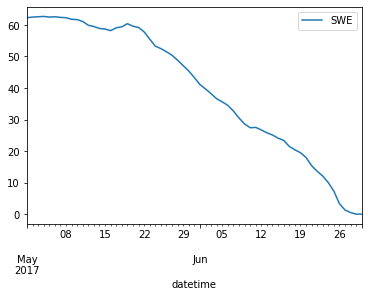

In [101]:
df.loc['2017-May':'2017-Jun'].plot()

In [102]:
df

,SWE
datetime,
1982-10-01,0.0
1982-10-02,0.0
1982-10-03,0.0
1982-10-04,0.0
1982-10-05,0.0
...,...
2021-11-02,4.5
2021-11-03,4.8
2021-11-04,5.0


In [103]:
pd.date_range(df.index[0], df.index[-1], freq='1Y')

DatetimeIndex(['1982-12-31', '1983-12-31', '1984-12-31', '1985-12-31',
               '1986-12-31', '1987-12-31', '1988-12-31', '1989-12-31',
               '1990-12-31', '1991-12-31', '1992-12-31', '1993-12-31',
               '1994-12-31', '1995-12-31', '1996-12-31', '1997-12-31',
               '1998-12-31', '1999-12-31', '2000-12-31', '2001-12-31',
               '2002-12-31', '2003-12-31', '2004-12-31', '2005-12-31',
               '2006-12-31', '2007-12-31', '2008-12-31', '2009-12-31',
               '2010-12-31', '2011-12-31', '2012-12-31', '2013-12-31',
               '2014-12-31', '2015-12-31', '2016-12-31', '2017-12-31',
               '2018-12-31', '2019-12-31', '2020-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

In [104]:
pd.period_range(df.index[0], df.index[-1], freq="Y")

PeriodIndex(['1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989',
             '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
             '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
             '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
             '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'],
            dtype='period[A-DEC]')

In [218]:
import datetime as dt
def date2DOWY(day_of_interest):
    day_of_interest = day_of_interest.date()
    dowy_start = dt.date(day_of_interest.year-1,10,1)
    dowy = day_of_interest - dowy_start
    return dowy.days
def when_did_the_snow_melt(data, swe_name='SWE'):
    """
    Inputs:
    ======
        data: SWE Data for a single water year as a pandas series
    """
    return data.loc[data[swe_name]>0].index[-1].to_pydatetime()

def get_last_day_of_snow(dataset):
    """Creates a list of dataframes split into water years
    """
    mint = dataset.index[0].to_pydatetime()
    maxt = dataset.index[-1].to_pydatetime()
    # NOTE: Ignores first year

    df = dataset.dropna()
    data_years = df.index.year.unique()
    water_years ={}
    for y in data_years[1:]:
        tmp = df.loc[(df.index > f"{y}-01-01") & (df.index <= f"{y}-08-15")]
        if tmp.empty:
            continue
        else: water_years[y] = tmp
    solution = {
        'water_year': [],
        'last_snow': []
    }
    
    for water_year in water_years:
        solution['water_year'].append(water_year)
        
        # make it year agnostic
        solution['last_snow'].append(datetime.strptime(when_did_the_snow_melt(water_years[water_year]).strftime("%m-%d-%y"), "%m-%d-%y"))
    dowy = []
    for day_of_interest in solution['last_snow']:
        dowy.append(date2DOWY(day_of_interest))
    solution['DOWY'] = dowy
    return pd.DataFrame(solution)


In [219]:
melt_dates = get_last_day_of_snow(df)
melt_dates.head()

Int64Index([1979, 1980, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
            1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
            2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
            2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
           dtype='int64', name='datetime')
             SWE
datetime        
1980-01-02  25.6
1980-01-03  25.6
1980-01-04  26.9
1980-01-05  27.0
1980-01-06  27.1
...          ...
1980-08-11   0.0
1980-08-12   0.0
1980-08-13   0.0
1980-08-14   0.0
1980-08-15   0.0

[227 rows x 1 columns]
             SWE
datetime        
1984-01-02  28.0
1984-01-03  28.4
1984-01-04  28.4
1984-01-05  28.5
1984-01-06  28.8
...          ...
1984-08-11   0.0
1984-08-12   0.0
1984-08-13   0.0
1984-08-14   0.0
1984-08-15   0.0

[227 rows x 1 columns]
             SWE
datetime        
1985-01-02  34.6
1985-01-03  34.6
1985-01-04  34.6
1985-01-05  34.6
1985-01-06  34.6
...          ...
1985-08-11   0.0
1985-08-12   0.0
19

,water_year,last_snow,DOWY
0,1980,1980-07-01,274
1,1984,1984-07-29,302
2,1985,1985-06-25,267
3,1986,1986-06-25,267
4,1987,1987-06-27,269


In [ ]:
melt_dates.loc[0]['last_snow'].year-1

1899

1983-06-30 00:00:00
1984-07-06 00:00:00
1985-06-11 00:00:00
1986-06-14 00:00:00
1987-06-06 00:00:00
1988-06-17 00:00:00
1989-06-14 00:00:00
1990-06-28 00:00:00
1991-07-06 00:00:00
1992-06-03 00:00:00
1993-06-08 00:00:00
1994-06-12 00:00:00
1995-06-26 00:00:00
1996-07-09 00:00:00
1997-07-04 00:00:00
1998-06-13 00:00:00
1999-07-21 00:00:00
2000-06-25 00:00:00
2001-06-08 00:00:00
2002-07-01 00:00:00
2003-06-22 00:00:00
2004-06-10 00:00:00
2005-05-22 00:00:00
2006-06-21 00:00:00
2007-06-23 00:00:00
2008-06-30 00:00:00
2009-06-16 00:00:00
2010-07-08 00:00:00
2011-07-21 00:00:00
2012-07-10 00:00:00
2013-06-29 00:00:00
2014-06-27 00:00:00
2015-06-03 00:00:00
2016-06-09 00:00:00
2017-06-28 00:00:00
2018-06-18 00:00:00
2019-06-08 00:00:00
2020-06-23 00:00:00
2021-06-23 00:00:00


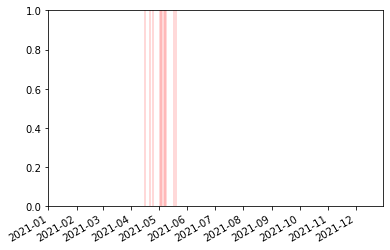

In [130]:
xs = [datetime(2021, melt_date.month, melt_date.day) for melt_date in melt_dates['last_snow']]

fig, ax = plt.subplots()

for x in xs:
    ax.axvline(x, color='red', alpha=0.2)
# ax.set_xlim("2021-01- 01", "2021-12-31")
ax.set_xlim(datetime(2021, 1, 1), datetime(2021, 12, 31))
fig.autofmt_xdate()

<AxesSubplot:xlabel='last_snow'>

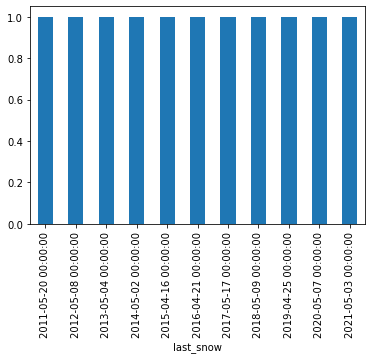

In [131]:
melt_dates['last_snow'].groupby(melt_dates['last_snow']).count().plot(kind='bar')

# All in one cell

Int64Index([1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
            1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
            2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
            2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
           dtype='int64', name='datetime')
             SWE
datetime        
1982-01-02   9.4
1982-01-03   9.8
1982-01-04   9.9
1982-01-05  10.0
1982-01-06  10.1
...          ...
1982-08-11   0.0
1982-08-12   0.0
1982-08-13   0.0
1982-08-14   0.0
1982-08-15   0.0

[226 rows x 1 columns]
             SWE
datetime        
1983-01-02   9.1
1983-01-03   9.3
1983-01-04  10.0
1983-01-05  10.9
1983-01-06  11.0
...          ...
1983-08-11   0.0
1983-08-12   0.0
1983-08-13   0.0
1983-08-14   0.0
1983-08-15   0.0

[226 rows x 1 columns]
             SWE
datetime        
1984-01-02  14.3
1984-01-03  14.9
1984-01-04  13.2
1984-01-05  13.2
1984-01-06  13.0
...          ...
1984-08-11   0.0
1984-08-12   0.0
19

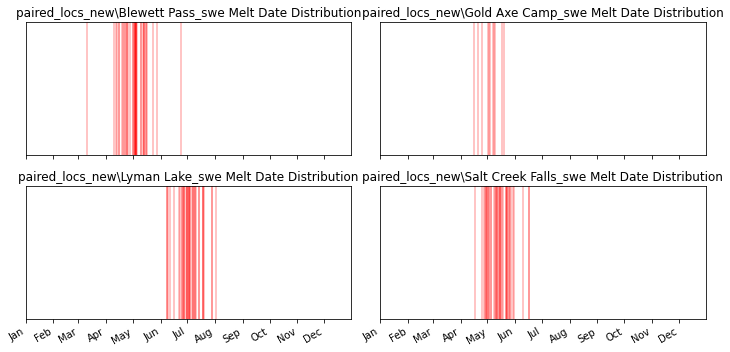

In [220]:
# Load in an example site
fs = [os.path.join("./data/fire_sites/paired_locs_new", f) for f in os.listdir("./data/fire_sites/paired_locs_new") if f.endswith('swe.csv')]
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 5), tight_layout=True)
axes = axes.flatten()

for ax, f in zip(axes, fs):
# f = "./data/fire_sites/Harts Pass_swe.csv"
    df = pd.read_csv(f, parse_dates=['datetime'])[['datetime', 'SNOTEL:WTEQ_D']].set_index('datetime').rename({"SNOTEL:WTEQ_D":"SWE"}, axis=1)
    df.head()
    melt_dates = get_last_day_of_snow(df.dropna())
    # # save the datasets as
    savename = f"./data/fire_sites/{f.split('/')[-1][:-4]}_meltdates.csv"
    melt_dates.to_csv(savename, index=False)

    xs = [datetime(2021, melt_date.month, melt_date.day) for melt_date in melt_dates['last_snow']]

    for x in xs:
        ax.axvline(x, color='red', alpha=0.3)
    # ax.set_xlim("2021-01- 01", "2021-12-31")
    ax.set_xlim(datetime(2021, 1, 1), datetime(2021, 12, 31))
    fig.autofmt_xdate()

    ax.set_title(f"{f.split('/')[-1][:-4]} Melt Date Distribution")
    ax.set_yticklabels([])
    ax.set_yticks([])

    ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b'))

Looks like most of the assigned melt dates are very realistic, except for 2 data points at Grouse Camp